### Evaluate the presence of batch effects by PILOT

<div class="alert alert-block alert-info">
In this tutorial, we include statistical tests to evaluate association between the detected trajectories with any experimental or clinical variable provided in the Kidney dataset.
</div>

In [1]:
import PILOT as pl
import scanpy as sc
from matplotlib.cm import get_cmap
import seaborn as sns
import pandas as pd

#### Reading the original Anndata (without filteration):
We consider the Kidney data without any filtering, we observe a high association with the tissue location: renal medulla, cortex of kidney, renal papilla or kidney).You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_ori.h5ad), and place it in the _Datasets_ folder.

In [2]:
adata = sc.read_h5ad('/Datasets/Kidney_ori.h5ad')

##### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
- adata: Pass your loaded Anndata object to PILOT.
    
- emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
- clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
- sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
- status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [4]:
pl.tl.wasserstein_distance(
    adata,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'disease'
    )

##### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.  In the upcoming trajectory analysis, the labels "IZ" stands for the ischaemic zone tissue. 
</div>

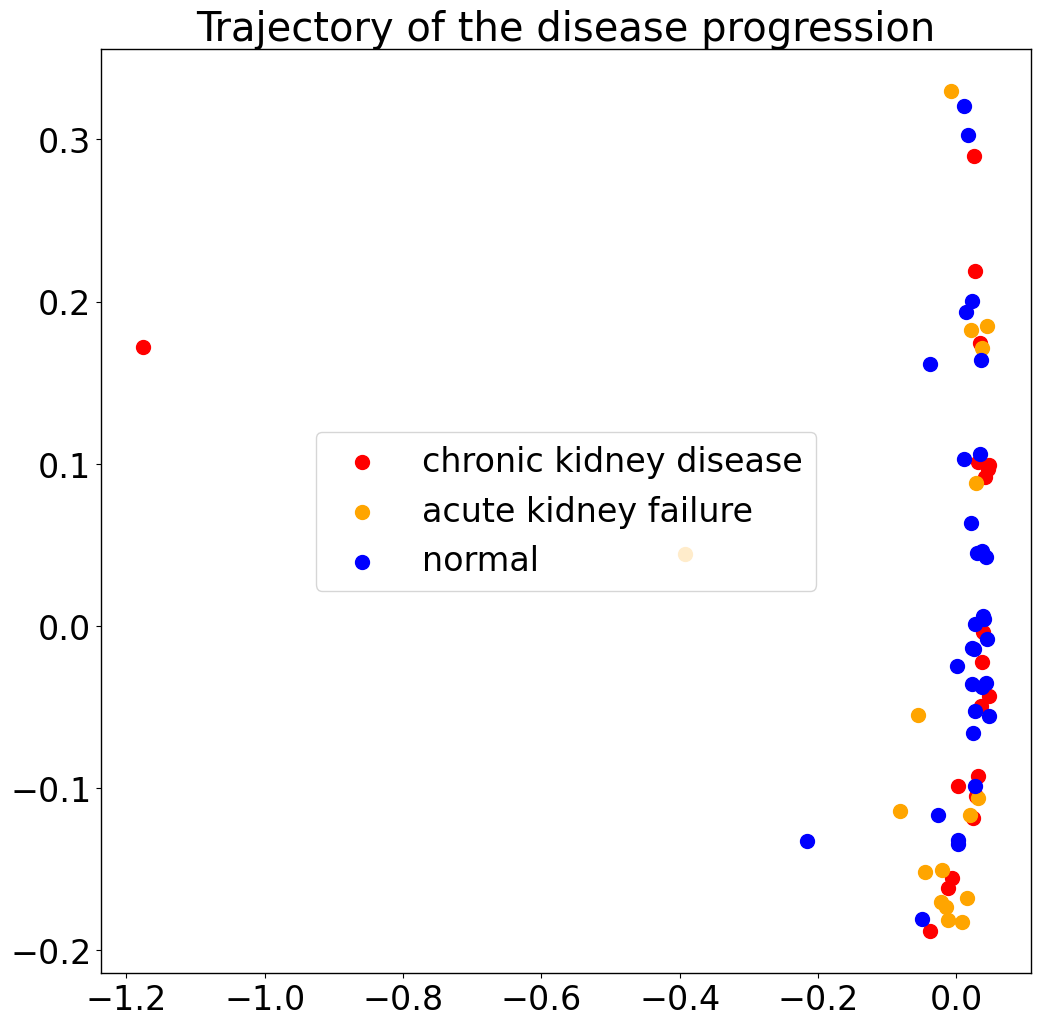

In [5]:
pl.pl.trajectory(adata, colors = ['red','orange','Blue'])

##### Fit a principal graph:
<div class="alert alert-block alert-info"> 
The difussion map creates an embedding that potentially reveals a trajectory in the data. Next, PILOT explores EIPLGraph to find the structure of the trajectory. An important parameter is the source_node, which indicates the start of the trajectory. Here, we selected a control sample (node with id = 7). This method returns ranked samples, which we define as a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample.
</div>


In [8]:
pl.pl.fit_pricipla_graph(adata, source_node = 8)

##### Cell-type importance:
<div class="alert alert-block alert-info"> 
Next, we can use the robust regression model to find cells whose proportions change linearly or non-linearly with disease progression. As indicated in the paper, major hallmark of MI progression are detected, i.e., a decrease of cardiomyocyte cells (CM) and an increase of fibroblasts and myeloid cells.
</div>

In [9]:
pl.tl.cell_importance(adata,heatmap_w = 20,height = 15,xlim = 30)

##### Statistical tests:
For categorical variables, this is based on ANOVA statistics on Trajectory analysis  while for numerical variables this is based on Spearman correlation. For these functions, provide the sample_col as the Sample/Patient column and your interested variables. Of note, these functions show just the significant variables (p-values) and ignore the insignificant ones.

In [10]:
numeric = ['degen.score','aStr.score','aEpi.score','matrisome.score','collagen.score','glycoprotein.score','proteoglycan.score']

In [11]:
categorical = ['BMI','hypertension','development_stage','sex','eGFR','diabetes_history','disease','tissue']

##### Categorical variables 

In [12]:
pl.tl.correlation_categorical_with_trajectory(adata, sample_col = 'donor_id', features = categorical)

,Feature,ANOVA_FStatistic,ANOVA_PValue
7,tissue,9.772883,0.000022
5,diabetes_history,3.429356,0.038475


#####  Numerical variables : You can read the main reference of kidney data for more detailed info about these variables.

In [13]:
pl.tl.correlation_numeric_with_trajectory(adata, sample_col = 'donor_id', features = numeric)

,Feature,Spearman_Correlation,Spearman_PValue
0,degen.score,0.262272,0.032027


##### Visualizing Feature Distribution Within Patients sub-group 

Utilizing the 'trajectory' function, you can skillfully visualize the distribution of significant variables over the identified trajectory. Please configure the requisite columns as outlined at the outset of this tutorial.

###### Tissue

In [14]:
palette = sns.color_palette("husl", len(adata.obs['tissue'].unique()))
colors = [palette[i] for i in range(len(adata.obs['tissue'].unique()))]
pl.tl.wasserstein_distance(
    adata,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'tissue'
    )

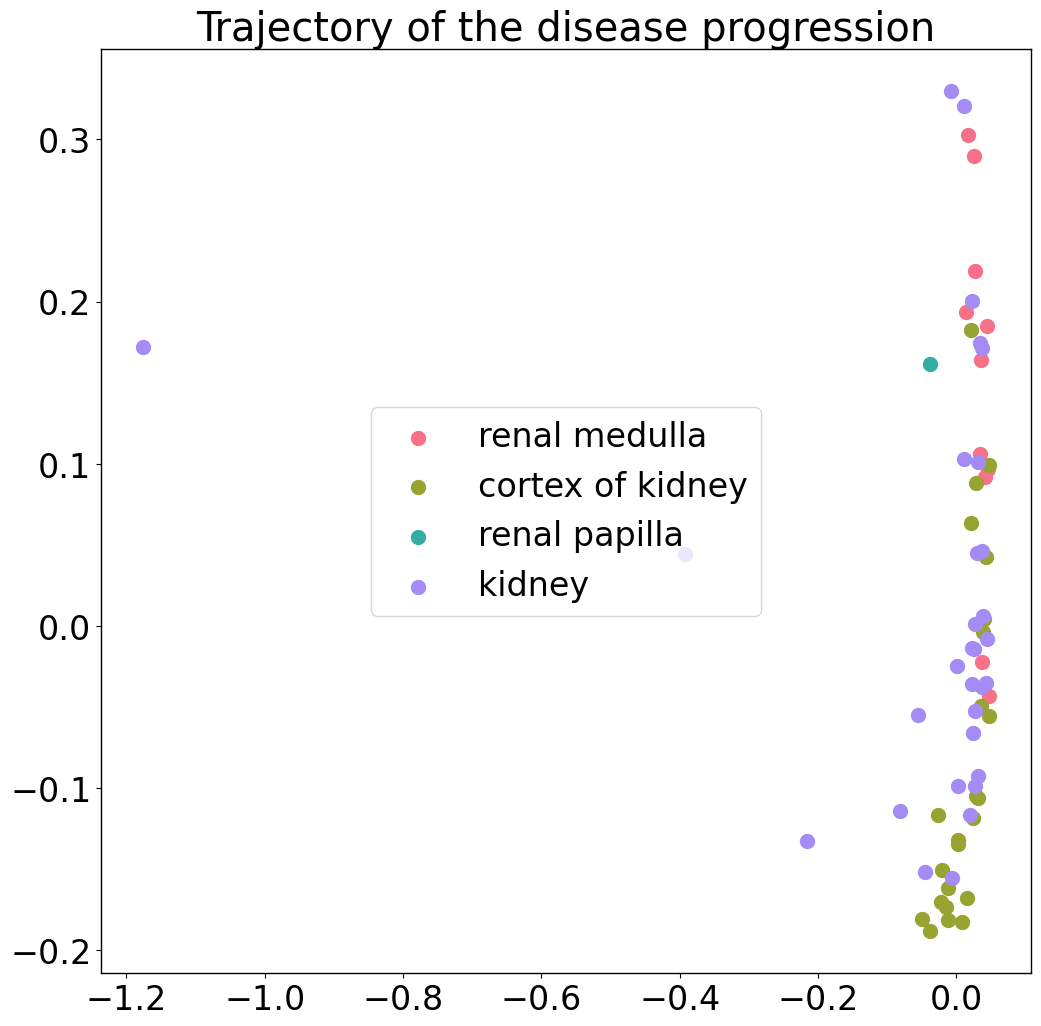

In [15]:
pl.pl.trajectory(adata, colors = colors)

#### Investigating after filtration

Here, we use the all previous steps for the filtered data set (only samples associated with the kidney (or whole kidney) location).You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_filtered.h5ad), and place it in the _Datasets_ folder.

In [102]:
adata_filtered=sc.read_h5ad('/Datasets/Kidney_filtered.h5ad')

In [107]:
pl.tl.wasserstein_distance(
    adata_filtered,
    emb_matrix  ='X_pca',
    clusters_col='cell_type',
    sample_col='donor_id',
    status='disease'
    )

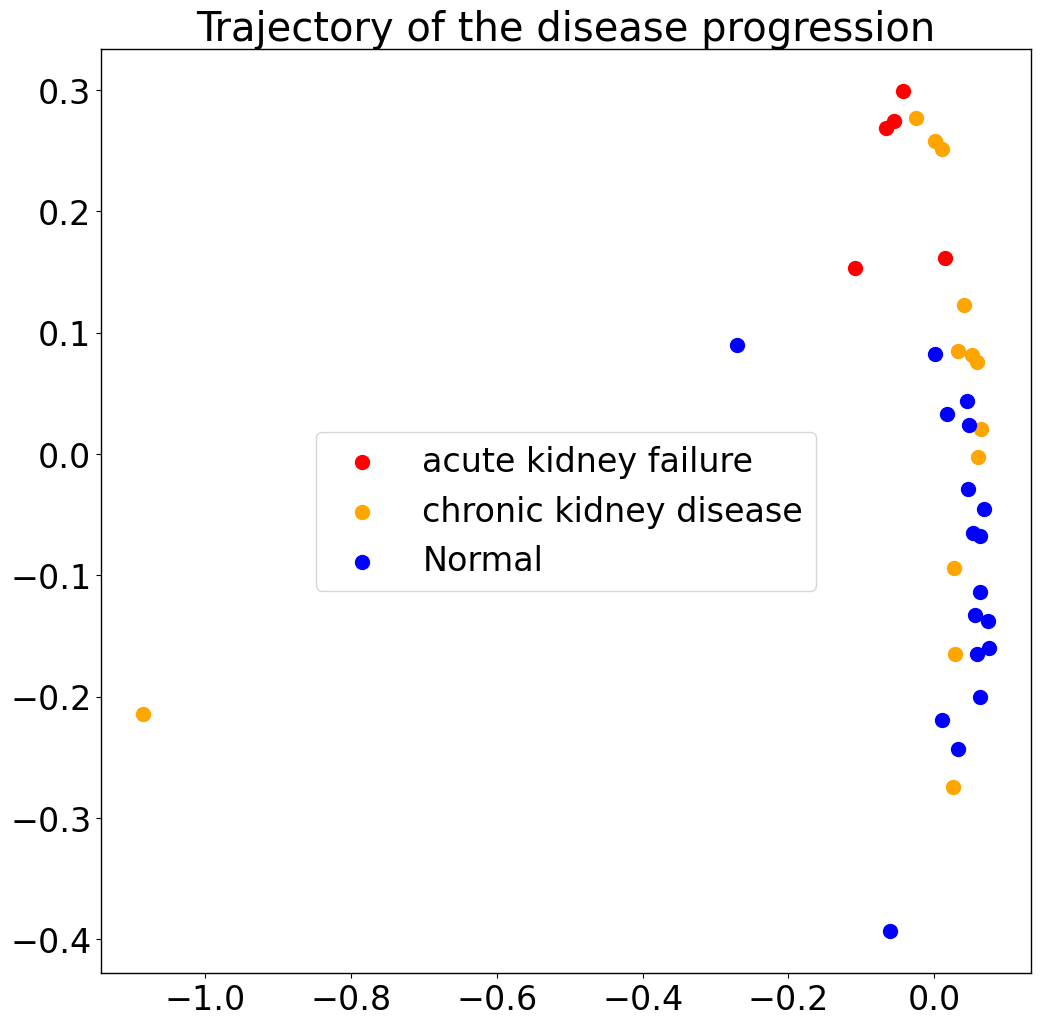

In [108]:
pl.pl.trajectory(adata_filtered, colors = ['red','orange','Blue'])

In [117]:
pl.pl.fit_pricipla_graph(adata_filtered, source_node = 2)


In [118]:
pl.tl.cell_importance(adata_filtered,heatmap_w=20,height=15,xlim=30)

##### Categorical variables 

In [116]:
pl.tl.correlation_categorical_with_trajectory(adata_filtered, sample_col='donor_id', features=['BMI','hypertension','development_stage','sex','eGFR','diabetes_history','disease'])

,Feature,ANOVA_FStatistic,ANOVA_PValue
6,disease,9.457675,0.000566
5,diabetes_history,12.517843,0.001189
0,BMI,3.969681,0.016358


###### Diabetes_history

In [9]:
palette = sns.color_palette("husl", len(adata_filtered.obs['diabetes_history'].unique()))
colors = [palette[i] for i in range(len(adata_filtered.obs['diabetes_history'].unique()))]
pl.tl.wasserstein_distance(
    adata_filtered,
    emb_matrix='X_pca',
    clusters_col='cell_type',
    sample_col='donor_id',
    status='diabetes_history'
    )

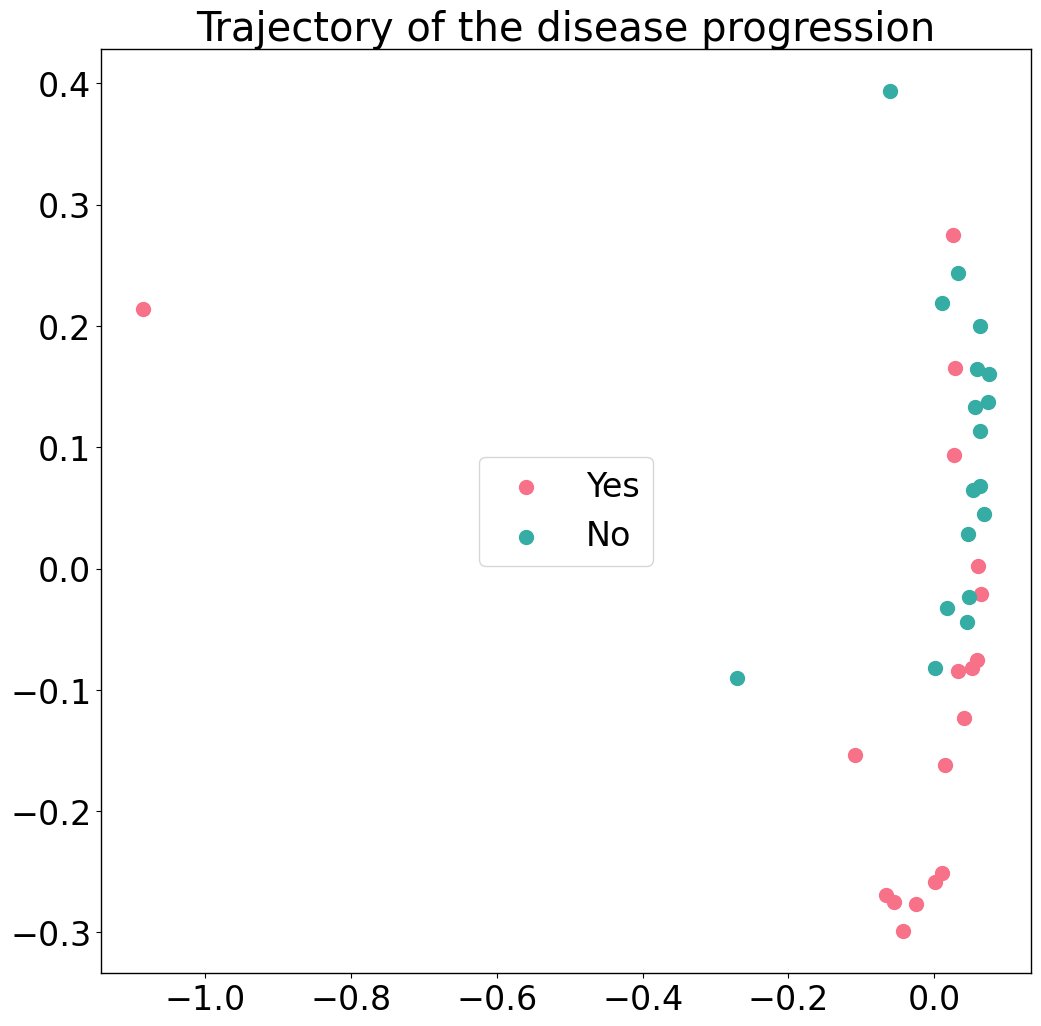

In [11]:
pl.pl.trajectory(adata_filtered, colors = colors)

###### BMI

In [13]:
palette = sns.color_palette("husl", len(adata_filtered.obs['BMI'].unique()))
colors = [palette[i] for i in range(len(adata_filtered.obs['BMI'].unique()))]
pl.tl.wasserstein_distance(
    adata_filtered,
    emb_matrix='X_pca',
    clusters_col='cell_type',
    sample_col='donor_id',
    status='BMI'
    )

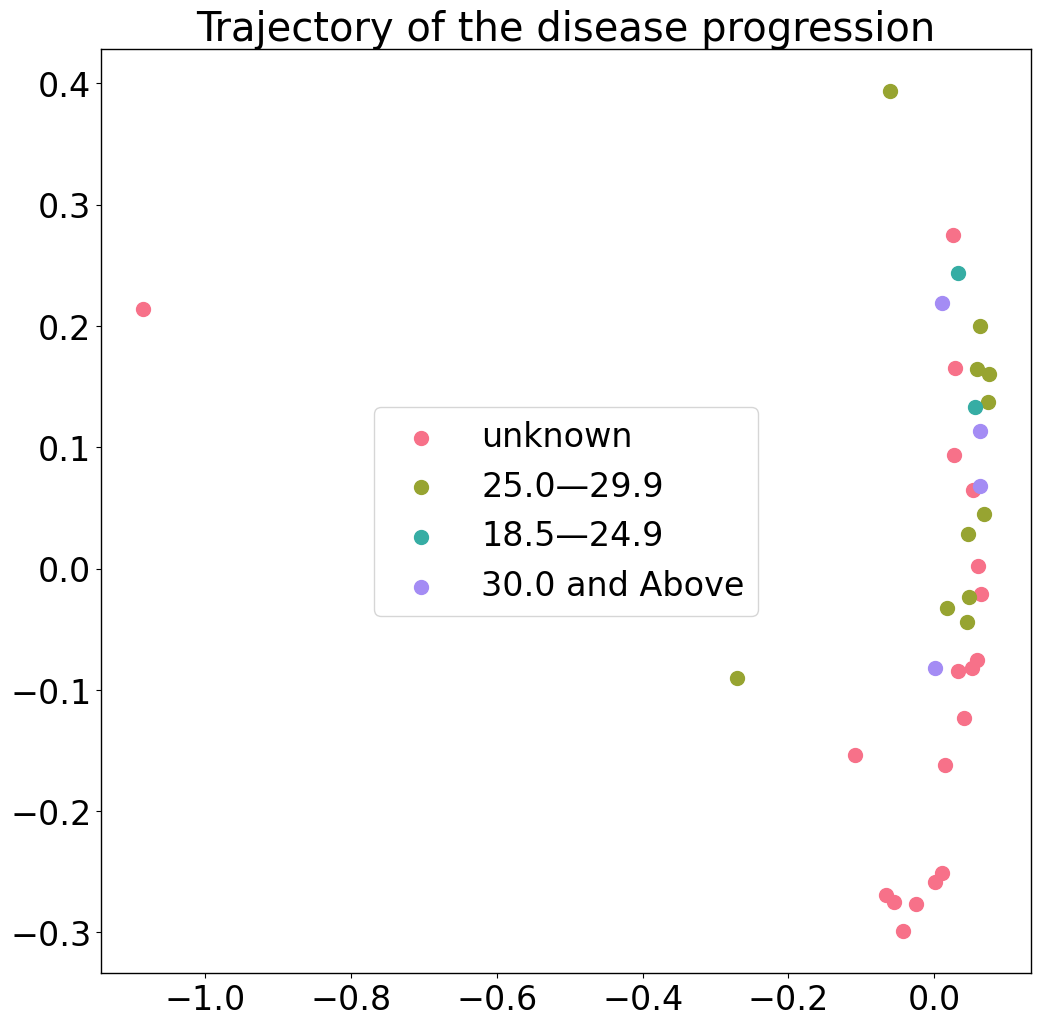

In [34]:
pl.pl.trajectory(adata_filtered, colors = colors)